## Final Project

### Analysis of features extarcted from audio data

- link to dataset:

### Motivation and Goals

The goal of this project is to clasdify voice recoridngs as either male of female, based on numerical features extracted from the Mozilla common voice dataset.
The purpose of this project is ...


## TODO

- Check Class Imbalance
    - 

In [46]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prettytable import PrettyTable
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer   
from sklearn.compose import make_column_selector
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from playsound import playsound
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import make_pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.base import clone
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.svm import LinearSVC
from tqdm import tqdm
from sklearn.metrics import (
    roc_auc_score, log_loss, RocCurveDisplay
)
from sklearn.calibration import calibration_curve
from sklearn.model_selection import StratifiedKFold

from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.base import clone
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np



FULL_RUN=False

## Data Loading

In [3]:
list_of_files = ["data_en_5.csv","data_de_5.csv","data_es_5.csv","data_fr_5.csv","data_da_5.csv","data_se_5.csv"]
folder_path = "./data/"
data_frames = []

for file_name in list_of_files:
    file_path = os.path.join(folder_path, file_name)
    if os.path.exists(file_path):
        with open(file_path, "r") as file:
            data_frames.append(pd.read_csv(file))

data_raw = pd.concat(data_frames, ignore_index=True)

data_raw.head()

/var/folders/sj/jnzp3shj55z40hh5qrf6c9yw0000gn/T/ipykernel_25030/70944752.py:9: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data_frames.append(pd.read_csv(file))
/var/folders/sj/jnzp3shj55z40hh5qrf6c9yw0000gn/T/ipykernel_25030/70944752.py:9: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data_frames.append(pd.read_csv(file))
/var/folders/sj/jnzp3shj55z40hh5qrf6c9yw0000gn/T/ipykernel_25030/70944752.py:9: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data_frames.append(pd.read_csv(file))
/var/folders/sj/jnzp3shj55z40hh5qrf6c9yw0000gn/T/ipykernel_25030/70944752.py:9: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data_frames.append(pd.read_csv(file))


,client_id,path,sentence,sentence_domain,age,gender,accents,locale,mfcc_01_mean,mfcc_02_mean,...,spec_contrast_band_4_std,spec_contrast_band_5_std,spec_contrast_band_6_std,spec_contrast_band_7_std,spec_rolloff_mean,spec_rolloff_std,zcr_mean,zcr_std,rmse_mean,rmse_std
0,00015e9c3555dafee96d32f38408877b6c33cc7668c5c7...,clips/common_voice_en_22070055.mp3,Hey,NaN,twenties,male_masculine,"India and South Asia (India, Pakistan, Sri Lanka)",en,-346.518280,105.766724,...,3.426842,4.632593,4.544755,3.958164,8989.213423,3783.708743,0.090629,0.042087,0.060498,0.114381
1,00015e9c3555dafee96d32f38408877b6c33cc7668c5c7...,clips/common_voice_en_22070053.mp3,no,NaN,twenties,male_masculine,"India and South Asia (India, Pakistan, Sri Lanka)",en,-322.999481,126.325928,...,4.280022,3.408587,2.381304,4.629252,7763.446514,3417.324623,0.066695,0.032427,0.049127,0.084837
2,00015e9c3555dafee96d32f38408877b6c33cc7668c5c7...,clips/common_voice_en_22070105.mp3,five,NaN,twenties,male_masculine,"India and South Asia (India, Pakistan, Sri Lanka)",en,-331.817749,117.011810,...,4.219483,3.785361,2.149989,4.760492,9540.267231,3227.213457,0.106078,0.038869,0.029110,0.057353
3,00015e9c3555dafee96d32f38408877b6c33cc7668c5c7...,clips/common_voice_en_22070052.mp3,nine,NaN,twenties,male_masculine,"India and South Asia (India, Pakistan, Sri Lanka)",en,-332.498993,135.062897,...,4.019066,3.495409,1.738416,3.265927,8103.400735,2729.275878,0.065502,0.027279,0.026913,0.042086
4,00015e9c3555dafee96d32f38408877b6c33cc7668c5c7...,clips/common_voice_en_22070093.mp3,Firefox,NaN,twenties,male_masculine,"India and South Asia (India, Pakistan, Sri Lanka)",en,-338.940430,107.349236,...,4.237970,3.737033,4.581891,4.229101,9500.395185,3109.524254,0.115977,0.054341,0.029288,0.053868


In [4]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183670 entries, 0 to 183669
Data columns (total 96 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   client_id                  183670 non-null  object 
 1   path                       183670 non-null  object 
 2   sentence                   183595 non-null  object 
 3   sentence_domain            24 non-null      object 
 4   age                        182568 non-null  object 
 5   gender                     183670 non-null  object 
 6   accents                    131636 non-null  object 
 7   locale                     183670 non-null  object 
 8   mfcc_01_mean               183670 non-null  float64
 9   mfcc_02_mean               183670 non-null  float64
 10  mfcc_03_mean               183670 non-null  float64
 11  mfcc_04_mean               183670 non-null  float64
 12  mfcc_05_mean               183670 non-null  float64
 13  mfcc_06_mean               18

In [5]:
data_raw["age"].unique()

array(['twenties', 'teens', 'thirties', 'fourties', 'fifties', 'sixties',
       nan, 'seventies', 'eighties', 'nineties'], dtype=object)

In [6]:
with open("./data/WORLD-2024.csv", "r") as file:
    world_population_raw = pd.read_csv(file)

def map_to_bin(age_range):
    try:
        lower = int(age_range.split('-')[0])
    except (ValueError, IndexError):
        return None
    return (lower // 10) * 10

world_population = world_population_raw.copy()
world_population['age'] = world_population_raw['Age'].apply(map_to_bin)
world_population['count'] = world_population['M'] + world_population['F']

world_population=world_population.groupby('age', as_index=False)[['M', 'F', 'count']].sum()

print("Global population by age group")
world_population_table= PrettyTable()
world_population_table.field_names = ["Age", "F", "M", "Count"]
for age in world_population["age"].unique():
    female= world_population[world_population["age"] == age]["F"].values[0]
    male= world_population[world_population["age"] == age]["M"].values[0]
    count = world_population[world_population["age"] == age]["count"].values[0]
    world_population_table.add_row([age, female, male, count])
print(world_population_table)

world_population= world_population[(world_population["age"] > 0)&(world_population["age"] < 80)]
world_population['percentage_f'] = world_population['F'] / world_population['count'].sum()
world_population['percentage_m'] = world_population['M'] / world_population['count'].sum()

world_population_table= PrettyTable()
world_population_table.field_names = ["Age", "Count", "Percentage - Female", "Percentage - Male"]
for age in world_population["age"].unique():
    count = world_population[world_population["age"] == age]["count"].values[0]
    percentage_f = np.round(world_population[world_population["age"] == age]["percentage_f"].values[0]*100,2)
    percentage_m = np.round(world_population[world_population["age"] == age]["percentage_m"].values[0]*100,2)
    world_population_table.add_row([age, count, percentage_f, percentage_m])
print(world_population_table)

Global population by age group
+------+-----------+-----------+------------+
| Age  |     F     |     M     |   Count    |
+------+-----------+-----------+------------+
| 0.0  | 647571780 | 683880297 | 1331452077 |
| 10.0 | 646940513 | 689549048 | 1336489561 |
| 20.0 | 591939467 | 627801903 | 1219741370 |
| 30.0 | 583727408 | 612129215 | 1195856623 |
| 40.0 | 499876584 | 511145211 | 1011021795 |
| 50.0 | 444383233 | 438029375 | 882412608  |
| 60.0 | 335349756 | 308707292 | 644057048  |
| 70.0 | 207266969 | 169569804 | 376836773  |
| 80.0 |  84361120 |  55509075 | 139870195  |
| 90.0 |  16467366 |  7180149  |  23647515  |
+------+-----------+-----------+------------+
+------+------------+---------------------+-------------------+
| Age  |   Count    | Percentage - Female | Percentage - Male |
+------+------------+---------------------+-------------------+
| 10.0 | 1336489561 |         9.7         |       10.34       |
| 20.0 | 1219741370 |         8.88        |        9.42       |
| 30.

In [7]:
def transform_age(age):
    if age=="teens":
        return 10
    elif age=="twenties":
        return 20
    elif age=="thirties":
        return 30
    elif age=="fourties":
        return 40
    elif age=="fifties":
        return 50
    elif age=="sixties":
        return 60
    elif age=="seventies":
        return 70
    elif isinstance(age, (int, float)):
        return age
    else:
        return None

data_raw["age"] = data_raw["age"].apply(transform_age)
print(f'dropped {data_raw["age"].isnull().sum()} rows')
data_raw = data_raw.dropna(subset=["age"])

# print counts
def generate_age_count_table(df):
    """
    Function to generate a PrettyTable with age counts
    :param df: DataFrame containing an 'age' column
    :return: PrettyTable object
    """
    table = PrettyTable()
    table.field_names = ["Age", "F", "M", "Count"]
    for age in sorted(df["age"].unique()):
        female_count = df[(df["age"] == age) & (df["gender"] == "female_feminine")].shape[0]
        male_count = df[(df["age"] == age) & (df["gender"] =="male_masculine")].shape[0]
        count = df[df["age"] == age].shape[0]
        table.add_row([age,female_count, male_count, count])
    return table

# Generate and print the table
table = generate_age_count_table(data_raw)
print(table)

dropped 1414 rows
+------+-------+-------+-------+
| Age  |   F   |   M   | Count |
+------+-------+-------+-------+
| 10.0 |  4652 | 16107 | 20759 |
| 20.0 | 15995 | 58950 | 74945 |
| 30.0 |  7393 | 32188 | 39581 |
| 40.0 |  4698 | 18513 | 23211 |
| 50.0 |  4434 |  9781 | 14215 |
| 60.0 |  2206 |  4969 |  7175 |
| 70.0 |  591  |  1779 |  2370 |
+------+-------+-------+-------+


In [8]:
def histograms(data):
    """
    Function to plot histograms of the dataframe
    :param data: DataFrame
    :return: None
    """
    data.hist(figsize=(20, 20), bins=20, color='black')
    plt.suptitle('Histograms (50 bins) of all features', fontsize=20)
    plt.tight_layout(rect=[0, 0, 1, 0.98])
    plt.show()
    
if FULL_RUN:
    histograms(data_raw)

In [9]:
col_to_log_transform = ['spec_contrast_band_7_mean', 'spec_contrast_band_7_std', 'rmse_mean', 'rmse_std']

In [10]:
# drop sentence_domain & exclude duplicate speakers
try:
    data_sampled = data_raw.groupby("client_id", group_keys=False).apply(
    lambda g: pd.concat([g.drop_duplicates("locale").head(5), g.head(5 - len(g.drop_duplicates("locale")))]))
    #data_sampled=data_raw[data_raw["locale"]=="en"]
    data_sampled = data_sampled.drop(columns=["sentence_domain"])
except:
    print("Column sentence_domain already dropped")

/var/folders/sj/jnzp3shj55z40hh5qrf6c9yw0000gn/T/ipykernel_25030/4268570829.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data_sampled = data_raw.groupby("client_id", group_keys=False).apply(


In [11]:
log_rmse = np.log(data_sampled['rmse_mean'] + 1e-10)


# First histogram
if FULL_RUN:
    fig, axes = plt.subplots(1, 2, figsize=(16, 8))
    log_rmse.hist(bins=200, ax=axes[0], color='black')
    # data_raw['rmse_mean'].hist(bins=200, ax=axes[0], color='black')
    axes[0].set_title('Before Dropping Quiet Audio Files')

# IQR-based outlier detection
Q1 = log_rmse.quantile(0.25)
Q3 = log_rmse.quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f"Lower Bound:{lower_bound}")
print(f"Upper Bound:{upper_bound}")

# Apply bounds to filter data
mask_inliers = (log_rmse >= lower_bound) & (log_rmse <= upper_bound)
data_clean = data_sampled[mask_inliers]

# Dropping quiet audio files
#bool_mask_quiet = data_sampled["rmse_mean"] < 0.001
#data_clean = data_sampled[~bool_mask_quiet]
print(f"Samples dropped: {data_sampled.shape[0]-data_clean.shape[0]}")
print(f"Samples left: {data_clean.shape[0]}")

# Second histogram
if FULL_RUN:
    np.log(data_clean['rmse_mean'] + 1e-10).hist(bins=200, ax=axes[1], color='black')
    # data_raw['rmse_mean'].hist(bins=200, ax=axes[1], color='black')
    axes[1].set_title('After Dropping Quiet Audio Files')

    plt.suptitle('Logarithm of rmse_mean', fontsize=20)
    plt.tight_layout(rect=[0, 0, 1, 0.98])
    plt.show()
    



Lower Bound:-5.461267857733466
Upper Bound:-1.1282232615511756
Samples dropped: 6194
Samples left: 170281


In [13]:
def constrained_undersample(
    data_clean,
    world_population,
    total_samples=10_000,
    seed=27,
    redistribute_shortfall=True
):
    np.random.seed(seed)

    # Prepare world_population long format
    pop_f = world_population[['age', 'percentage_f']].rename(columns={'percentage_f': 'percentage'})
    pop_f['gender'] = 'female_feminine'
    pop_m = world_population[['age', 'percentage_m']].rename(columns={'percentage_m': 'percentage'})
    pop_m['gender'] = 'male_masculine'
    pop_long = pd.concat([pop_f, pop_m], ignore_index=True)

    # Normalize percentages to sum to 1 (in case of small drift)
    pop_long['percentage'] = pop_long['percentage'] / pop_long['percentage'].sum()

    # Compute target counts per stratum
    pop_long['target_count'] = (pop_long['percentage'] * total_samples).round().astype(int)

    # Actual counts in your data_clean
    actual_counts = data_clean.groupby(['age', 'gender']).size().reset_index(name='available_count')

    # Merge target + available
    strata = pop_long.merge(actual_counts, on=['age', 'gender'], how='left').fillna({'available_count': 0})
    strata['available_count'] = strata['available_count'].astype(int)

    # Allocate samples — take min(target, available)
    strata['samples_taken'] = strata[['target_count', 'available_count']].min(axis=1)

    total_taken = strata['samples_taken'].sum()
    shortfall = total_samples - total_taken

    strata['final_sample_count'] = strata['samples_taken']  # Default if no redistribution

    # Redistribute shortfall if requested
    if redistribute_shortfall and shortfall > 0:
        strata['surplus'] = strata['available_count'] - strata['samples_taken']
        strata['can_take_more'] = strata['surplus'] > 0

        if strata['can_take_more'].any():
            surplus_total = strata.loc[strata['can_take_more'], 'surplus'].sum()
            strata['extra_allocation'] = 0

            # Proportional allocation of shortfall
            strata.loc[strata['can_take_more'], 'extra_allocation'] = (
                (strata['surplus'] / surplus_total) * shortfall
            ).round().astype(int)

            # Ensure no over-allocation
            strata['final_sample_count'] = strata['samples_taken'] + strata['extra_allocation']
            strata['final_sample_count'] = strata[['final_sample_count', 'available_count']].min(axis=1)

 
    # Sample from data_clean
    sampled_dfs = []
    for _, row in strata.iterrows():
        mask = (data_clean['age'] == row['age']) & (data_clean['gender'] == row['gender'])
        df_group = data_clean[mask]
        n_samples = row['final_sample_count']
        if n_samples > 0 and not df_group.empty:
            sampled_group = df_group.sample(n=n_samples, random_state=seed)
            sampled_dfs.append(sampled_group)

    if sampled_dfs:
        data_reduced = pd.concat(sampled_dfs, ignore_index=True)
    else:
        # Return empty df with same columns as data_clean
        data_reduced = data_clean.iloc[0:0].copy()

    print(strata[['age', 'gender', 'available_count', 'target_count', 'final_sample_count']])
    print(f"Total samples taken: {data_reduced.shape[0]}")
    print(f"Male to Female ratio: {data_reduced.groupby('gender').size().to_dict()}")

    return data_reduced


data_reduced = constrained_undersample(
    data_clean,
    world_population,
    total_samples=60000,
    redistribute_shortfall=False,
)


     age           gender  available_count  target_count  final_sample_count
0   10.0  female_feminine             4344          5823                4344
1   20.0  female_feminine            14602          5328                5328
2   30.0  female_feminine             6808          5254                5254
3   40.0  female_feminine             4370          4499                4370
4   50.0  female_feminine             4236          4000                4000
5   60.0  female_feminine             2103          3018                2103
6   70.0  female_feminine              583          1865                 583
7   10.0   male_masculine            14949          6206                6206
8   20.0   male_masculine            54928          5650                5650
9   30.0   male_masculine            29885          5509                5509
10  40.0   male_masculine            17518          4600                4600
11  50.0   male_masculine             9340          3942                3942

In [14]:
# Data frames 
y = data_reduced[["gender", "age", "locale"]].copy()
y["gender"] = y["gender"].astype(str)
X= data_reduced.drop(columns=["gender", "age", "accents", "locale"])


# Perform the train test split
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.15, random_state=27)
for train_full_index, test_index in sss.split(X,  y['age'].astype(str) + "-" + y['gender']):
    X_train_full = X.iloc[train_full_index]
    y_train_full = y.iloc[train_full_index]
    X_test = X.iloc[test_index]
    y_test = y.iloc[test_index]

# Further split the full training data set into training and validation
sss_train_val = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=27)
for train_index, val_index in sss_train_val.split(X_train_full, y_train_full['age'].astype(str) + "-" + y_train_full['gender']):
    X_train = X_train_full.iloc[train_index]
    y_train = y_train_full.iloc[train_index]
    X_val = X_train_full.iloc[val_index]
    y_val = y_train_full.iloc[val_index]

# Drop columns that are not needed
X_train = X_train.drop(columns=["path", "sentence", "client_id"])
X_test = X_test.drop(columns=["path", "sentence", "client_id"])
X_val = X_val.drop(columns=["path", "sentence", "client_id"])


# Df only for EDA
df_eda = X_train.copy()
df_eda['age'] = y_train["age"]
df_eda['gender'] = y_train['gender']
df_eda['age-gender'] = y_train["age"].astype(int).astype(str) + "-" + y_train["gender"].str[0]
df_eda['locale']=y_train['locale']
df_eda_cat = df_eda.select_dtypes(include=['object'])
df_eda_num = df_eda.select_dtypes(include=['number'])



print("X_train shape: ", X_train.shape)
print("X_val shape: ", X_val.shape)
print("X_test shape: ", X_test.shape)

X_train shape:  (38211, 88)
X_val shape:  (9553, 88)
X_test shape:  (8429, 88)


In [15]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38211 entries, 50101 to 13882
Data columns (total 88 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   mfcc_01_mean               38211 non-null  float64
 1   mfcc_02_mean               38211 non-null  float64
 2   mfcc_03_mean               38211 non-null  float64
 3   mfcc_04_mean               38211 non-null  float64
 4   mfcc_05_mean               38211 non-null  float64
 5   mfcc_06_mean               38211 non-null  float64
 6   mfcc_07_mean               38211 non-null  float64
 7   mfcc_08_mean               38211 non-null  float64
 8   mfcc_09_mean               38211 non-null  float64
 9   mfcc_10_mean               38211 non-null  float64
 10  mfcc_11_mean               38211 non-null  float64
 11  mfcc_12_mean               38211 non-null  float64
 12  mfcc_13_mean               38211 non-null  float64
 13  mfcc_14_mean               38211 non-null  floa

In [16]:
y_train["gender"].info()

<class 'pandas.core.series.Series'>
Index: 38211 entries, 50101 to 13882
Series name: gender
Non-Null Count  Dtype 
--------------  ----- 
38211 non-null  object
dtypes: object(1)
memory usage: 597.0+ KB


## EDA

In [17]:
df_eda.describe()

,mfcc_01_mean,mfcc_02_mean,mfcc_03_mean,mfcc_04_mean,mfcc_05_mean,mfcc_06_mean,mfcc_07_mean,mfcc_08_mean,mfcc_09_mean,mfcc_10_mean,...,spec_contrast_band_5_std,spec_contrast_band_6_std,spec_contrast_band_7_std,spec_rolloff_mean,spec_rolloff_std,zcr_mean,zcr_std,rmse_mean,rmse_std,age
count,38211.000000,38211.000000,38211.000000,38211.000000,38211.000000,38211.000000,38211.000000,38211.000000,38211.000000,38211.000000,...,38211.000000,38211.000000,38211.000000,38211.000000,38211.000000,38211.000000,38211.000000,38211.000000,38211.000000,38211.000000
mean,-426.532341,102.989624,-1.557968,21.846729,6.130813,5.661013,-4.013198,-1.822237,-5.550834,-3.769197,...,4.955978,7.008970,6.581551,4907.002511,2815.705952,0.085258,0.072682,0.049168,0.056991,32.822747
std,80.310765,27.313666,18.654277,14.960730,12.938972,13.237289,10.090757,9.549778,8.025722,7.037082,...,0.972239,2.106599,2.956990,1813.275985,972.134566,0.039307,0.029286,0.034146,0.033352,17.246264
min,-746.736267,-8.795303,-89.969749,-50.697857,-65.947586,-51.119732,-64.075363,-50.250923,-39.960201,-33.960049,...,1.992125,1.640907,1.489527,588.998368,177.373857,0.004683,0.008270,0.004250,0.000868,10.000000
25%,-474.246078,85.731270,-13.129265,11.741795,-2.201385,-3.831069,-10.393500,-7.938358,-10.866271,-8.399477,...,4.277031,5.541813,4.797394,3603.780985,2052.427360,0.057253,0.051667,0.024213,0.031470,20.000000
50%,-416.523010,103.483879,-0.909747,21.524435,6.332401,5.188609,-3.426193,-1.778513,-5.370834,-3.667962,...,4.823439,6.811430,5.858478,4572.798295,2715.803632,0.078441,0.069343,0.043179,0.053771,30.000000
75%,-372.341827,121.130207,10.669439,31.582960,14.664300,14.816805,2.752001,4.391430,-0.176069,0.851569,...,5.499453,8.255888,7.216399,5936.656078,3460.154977,0.105799,0.090792,0.066310,0.076674,50.000000
max,-49.350529,208.463013,79.641441,91.981911,65.791161,61.254612,37.684414,48.403198,27.458626,36.244278,...,12.912757,20.779267,26.397868,14939.062500,6728.646959,0.502198,0.273539,0.321824,0.314576,70.000000


In [18]:
# comparing the means of the features using groupbys

def table_grouped_by(df, group_by_col):
    grouped_by_y = df.groupby(group_by_col).mean().T
    table = PrettyTable()
    table.field_names = ["Feature"]+list(grouped_by_y.columns)
    for feature, values in zip(grouped_by_y.index, grouped_by_y.values):
        table.add_row([feature] + values.tolist())
    table.align = "r"
    table.align["Feature"] = "l"
    table.title = "Grouped by " + group_by_col.name
    print(table)
    
table_grouped_by(df_eda_num, df_eda_cat['gender'])
table_grouped_by(df_eda_num, df_eda_num['age'])



+--------------------------------------------------------------------------+
|                            Grouped by gender                             |
+---------------------------+----------------------+-----------------------+
| Feature                   |      female_feminine |        male_masculine |
+---------------------------+----------------------+-----------------------+
| mfcc_01_mean              |  -426.86432523038667 |    -426.2468176561664 |
| mfcc_02_mean              |    97.73106377519362 |     107.5122468162696 |
| mfcc_03_mean              |  -2.3780907325955134 |    -0.852622188993278 |
| mfcc_04_mean              |   20.032023596568674 |    23.407466018331743 |
| mfcc_05_mean              |   3.3550911969556645 |     8.518071788480086 |
| mfcc_06_mean              |   2.0611905102543444 |     8.757038551423868 |
| mfcc_07_mean              |    -6.16499868941798 |    -2.162541840366706 |
| mfcc_08_mean              |   -3.922978885314415 | -0.015494562706278718 |

In [19]:
# Correlation Matrix (save to zoom in)

def generate_correlation_matrix(df):
    plt.figure(figsize=(50, 50))
    corr_matrix = df.corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix')
    plt.tight_layout()
    plt.show()

if FULL_RUN:    
    generate_correlation_matrix(df_eda_num)

In [20]:
# scatter plots
def scatter_plot(df, x_col, y_col):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=x_col, y=y_col, hue='gender', palette={'male_masculine': 'black', 'female_feminine': 'blue'}, alpha=0.3)
    plt.title(f'Scatter plot of {x_col} vs {y_col}')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.show()

if FULL_RUN:
    # mfcc 
    # ....mfcc not multimodal
    scatter_plot(df_eda, 'mfcc_01_mean', 'mfcc_07_mean')
    scatter_plot(df_eda, 'mfcc_01_mean', 'spec_centroid_mean')
    # ....mfcc bimodal
    scatter_plot(df_eda, 'mfcc_02_mean', 'mfcc_04_mean')
    scatter_plot(df_eda, 'mfcc_02_mean', 'zcr_mean')


    # chroma differences in distances
    scatter_plot(df_eda, 'chroma_01_mean', 'chroma_02_mean')
    scatter_plot(df_eda, 'chroma_01_mean', 'chroma_05_mean')
    scatter_plot(df_eda, 'chroma_01_mean', 'chroma_11_mean')

    # spectral
    scatter_plot(df_eda, 'spec_centroid_mean', 'spec_bandwidth_mean')
    scatter_plot(df_eda, 'spec_centroid_mean', 'spec_contrast_band_1_mean')
    scatter_plot(df_eda, 'spec_centroid_mean', 'spec_contrast_band_4_mean')
    scatter_plot(df_eda, 'spec_centroid_mean', 'spec_contrast_band_7_mean')
    scatter_plot(df_eda, 'spec_centroid_mean', 'zcr_mean')

    # temporal
    scatter_plot(df_eda, 'zcr_mean', 'rmse_mean')

## Data Preprocessing

In [21]:
# data preprocessing

# TODO normalization
# TODO Log transformation
# TODO Pick apart multimodality


In [22]:
# Log transformation
def use_log(data, scale_by_min=False):
    assert np.min(data) >= 0, 'data contains negative or zero values at log transform'
    transformed = np.log(data)
    return transformed

# Defining Transformers
scl = StandardScaler()
log = FunctionTransformer(func=use_log, validate=False, kw_args={'scale_by_min': True}, feature_names_out='one-to-one')

# Defining Models
pca = PCA(n_components=0.95) # try differnet n_components
lda = LinearDiscriminantAnalysis()

# Pipelines
pipeline_log = Pipeline(steps=[
    ('log', log),
    ('scaler', scl)
])

pipeline_num = Pipeline(steps=[
    ('scaler', scl)
])

# Column selection
preprocessing = ColumnTransformer([
('log', pipeline_log, col_to_log_transform),
], remainder=pipeline_num)

preprocessing_pca = Pipeline(steps=[
    ('preprocessing', preprocessing),
    ('pca', pca)
    ]
)
preprocessing_lda = Pipeline(steps=[
    ('preprocessing', preprocessing),
    ('lda', lda)
    ]
)


In [23]:
if FULL_RUN:
    preprocessed_pca = preprocessing_pca.fit_transform(X_train)
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=preprocessed_pca[:, 0], y=preprocessed_pca[:, 1], hue=y_train["gender"], palette={'male_masculine': 'blue', 'female_feminine': 'red'}, alpha=0.6)
    plt.title('Scatterplot of PC1 vs PC2')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend(title='Gender')
    plt.show()

In [24]:
if FULL_RUN:
    preprocessed = preprocessing.fit_transform(X_train)
    features = preprocessing.get_feature_names_out()
    df = pd.DataFrame(preprocessed, columns=features)
    df.head()
    histograms(df)

In [55]:
def evaluate_models(y_true, y_pred_dict, figsize=(12, 8), expanded=True, label=None):
    """
    Function to evaluate multiple models and compare their performance
    
    Parameters:
    -----------
    y_true : array-like
        True labels
    y_pred_dict : dict
        Dictionary of model predictions where keys are model names and values are predicted labels
        Example: {'Model1': y_pred1, 'Model2': y_pred2}
    figsize : tuple, optional
        Figure size for the visualizations, default is (12, 8)
        
    Returns:
    --------
    metrics_df : pandas DataFrame
        DataFrame containing performance metrics for all models
    """

    
    # Initialize a dictionary to store metrics
    metrics = {
        'Model': [],
        'Accuracy': [],
        'Precision': [],
        'Recall': [],
        'F1-score': []
    }
    
    if expanded:
    # Set up the plot for confusion matrices
        n_models = len(y_pred_dict)
        fig, axes = plt.subplots(1, n_models, figsize=figsize)
        if n_models == 1:
            axes = [axes]  # Convert to list for consistent indexing
    
    # Evaluate each model
    for i, (model_name, y_pred) in enumerate(y_pred_dict.items()):
        # Print classification report
        print(f"\n===== {model_name}: {label} =====")
        print("Classification Report:")
        print(classification_report(y_true, y_pred))
        
        # Store metrics
        metrics['Model'].append(model_name)
        metrics['Accuracy'].append(accuracy_score(y_true, y_pred))
        
        # Handle binary and multi-class cases for precision, recall, and f1
        if len(np.unique(y_true)) == 2:
            # Binary classification
            metrics['Precision'].append(precision_score(y_true, y_pred, average='binary'))
            metrics['Recall'].append(recall_score(y_true, y_pred, average='binary'))
            metrics['F1-score'].append(f1_score(y_true, y_pred, average='binary'))
        else:
            # Multi-class classification
            metrics['Precision'].append(precision_score(y_true, y_pred, average='weighted'))
            metrics['Recall'].append(recall_score(y_true, y_pred, average='weighted'))
            metrics['F1-score'].append(f1_score(y_true, y_pred, average='weighted'))
        
        if expanded:
            # Plot confusion matrix
            cm = confusion_matrix(y_true, y_pred)
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
            axes[i].set_title(f'Confusion Matrix - {model_name}')
            axes[i].set_xlabel('Predicted')
            axes[i].set_ylabel('True')
    
    if expanded:
        plt.tight_layout()
        plt.show()
    
    # Create metrics DataFrame
    metrics_df = pd.DataFrame(metrics)
    
    if expanded:
        # Plot metrics comparison
        plt.figure(figsize=(10, 6))
        metrics_df_plot = metrics_df.set_index('Model')
        metrics_df_plot.plot(kind='bar', figsize=(10, 6))
        plt.title('Model Performance Comparison')
        plt.ylabel('Score')
        plt.ylim(0, 1)
        plt.legend(loc='lower right')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()
    
    return metrics_df

In [56]:
def fit_pipeline_predict_evaluate(model_class, model_name,PCA=False, LDA=False):
    """
    Function to fit a pipeline, make predictions, and evaluate the model with optional weights.
    """

    # Encode the target labels (gender) for MLPClassifier compatibility
    gender_encoder = LabelEncoder()
    y_train_encoded = gender_encoder.fit_transform(y_train['gender'])
    y_val_encoded = gender_encoder.transform(y_val['gender'])
    
    # Create fresh instances of the model
    model = clone(model_class)
    
    # Build pipelines
    pipeline = make_pipeline(preprocessing, model)
        
    # Fit the model
    pipeline.fit(X_train, y_train_encoded)
      
    # Predict on training set
    prd_train = pipeline.predict(X_train)
  
    # Predict on validation set
    prd_val = pipeline.predict(X_val)

    
    evaluate_train = {
    f'{model_name}': prd_train,
    }
    evaluate_val = {
        f'{model_name}': prd_val,
    }
    
    # Evaluate on training predictions
    print(f"Evaluating {model_name} on training set...")
    evaluate_models(y_train_encoded, evaluate_train, (12, 8), False, "Training Set")

    # Evaluate on validation predictions
    print(f"Evaluating {model_name} on validation set...")
    return evaluate_models(y_val_encoded, evaluate_val, (12, 8), True, "Validation Set")

In [57]:
from sklearn.metrics import make_scorer, cohen_kappa_score

# Define QWK scorer
qwk_scorer = make_scorer(cohen_kappa_score, greater_is_better=True, weights='quadratic')

In [58]:
def optimize_with_gridsearch(classifier, param_grid, classifier_name):
    """
    Function to perform grid search optimization for a given classifier and parameter grid.
    """
    model = clone(classifier)

    # Encode the target labels (gender) for compatibility
    gender_encoder = LabelEncoder()
    y_train_encoded = gender_encoder.fit_transform(y_train['gender'])
    y_val_encoded = gender_encoder.transform(y_val['gender'])

    # Create stratification labels from age and gender
    strat_labels = y_train['age'].astype(str) + "-" + y_train['gender']

    # Define stratified k-fold cross-validation on the training set
    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=27).split(X_train, strat_labels)

    # Create a pipeline with preprocessing and the classifier
    base_pipeline = Pipeline([
        ('preprocessing', preprocessing),
        (classifier_name, model)
    ])

    # Perform grid search
    grid_search = GridSearchCV(
        base_pipeline,
        param_grid=param_grid,
        cv=cv,
        scoring="accuracy",
        verbose=2,
        n_jobs=-1
    )

    # Fit the grid search using encoded target labels
    grid_search.fit(X_train, y_train_encoded)

    # Display the best parameters
    print(f"Best Parameters: {grid_search.best_params_}")
    best_model = grid_search.best_estimator_

    # Predict using the best model and decode the predictions
    prd_train_encoded = best_model.predict(X_train)
    prd_val_encoded = best_model.predict(X_val)

    prd_train = gender_encoder.inverse_transform(prd_train_encoded)
    prd_val = gender_encoder.inverse_transform(prd_val_encoded)

    # Display top configurations
    results_df = pd.DataFrame(grid_search.cv_results_)
    results_df_sorted = results_df.sort_values(by='mean_test_score', ascending=False)
    print("\nTop 5 configurations:")
    display_cols = [col for col in results_df.columns if col.startswith("param_")]
    display_cols += ['mean_test_score', 'std_test_score']
    print(results_df_sorted[display_cols].head())

    # Build evaluation dictionaries
    evaluate_train = {classifier_name: prd_train}
    evaluate_val = {classifier_name: prd_val}

    # Evaluate on training set
    print(f"Evaluating {classifier_name} on training set...")
    evaluate_models(y_train['gender'], evaluate_train, (12, 8), False, "Training Set")

    # Evaluate on validation set
    print(f"Evaluating {classifier_name} on validation set...")
    return evaluate_models(y_val['gender'], evaluate_val, (12, 8), True, "Validation Set"), results_df_sorted

Evaluating MLP on training set...

===== MLP: Training Set =====
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17668
           1       1.00      1.00      1.00     20543

    accuracy                           1.00     38211
   macro avg       1.00      1.00      1.00     38211
weighted avg       1.00      1.00      1.00     38211

Evaluating MLP on validation set...

===== MLP: Validation Set =====
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      4417
           1       0.92      0.91      0.91      5136

    accuracy                           0.91      9553
   macro avg       0.91      0.91      0.91      9553
weighted avg       0.91      0.91      0.91      9553



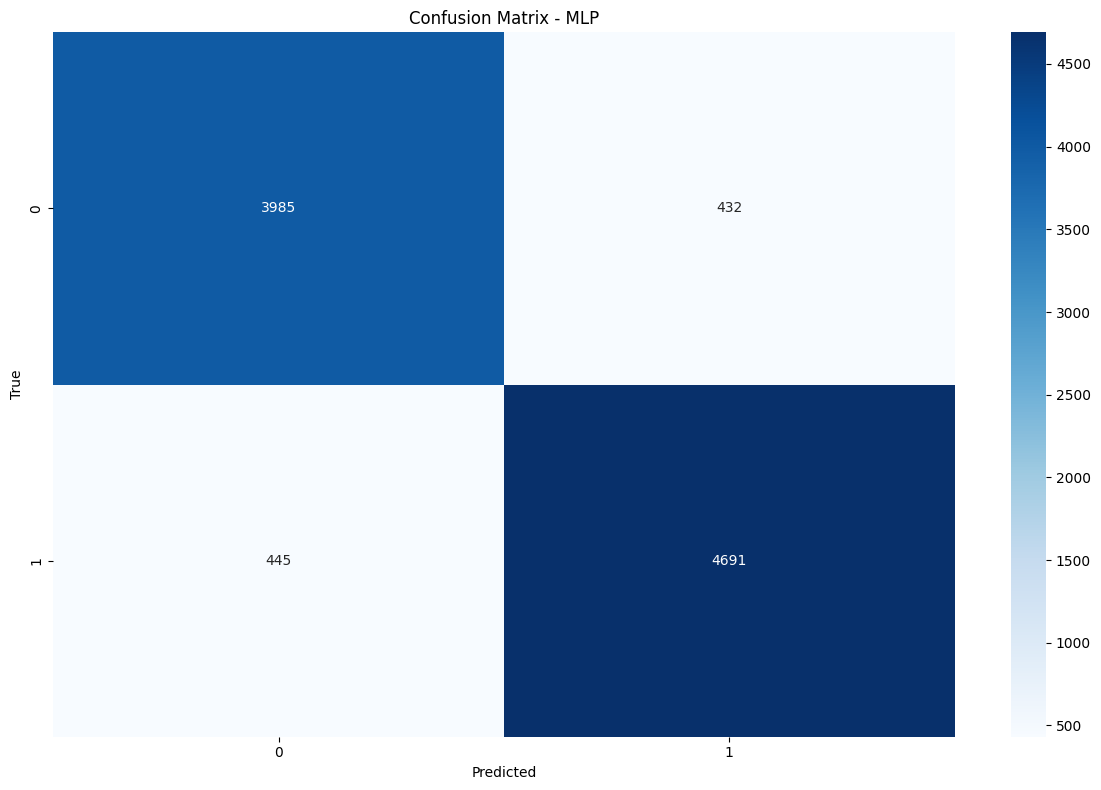

<Figure size 1000x600 with 0 Axes>

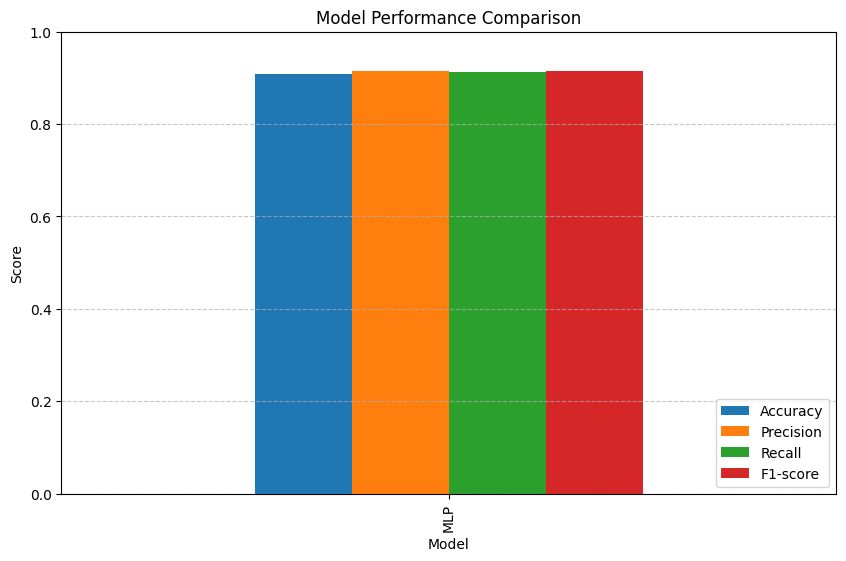

,Model,Accuracy,Precision,Recall,F1-score
0,MLP,0.908196,0.915674,0.913357,0.914514


In [59]:
fit_pipeline_predict_evaluate(MLPClassifier(
            hidden_layer_sizes=(128, 64, 32),
            max_iter=2000,
            alpha=0.001,
            learning_rate_init=0.0005,
            random_state=27,
            learning_rate='adaptive',
        ), "MLP")

Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV 3/3] END mlp__activation=relu, mlp__alpha=0.0001, mlp__batch_size=32, mlp__hidden_layer_sizes=(128, 64, 32), mlp__learning_rate_init=0.001;, score=0.900 total time=  14.5s
[CV 3/3] END mlp__activation=relu, mlp__alpha=0.0001, mlp__batch_size=32, mlp__hidden_layer_sizes=(128, 64, 32), mlp__learning_rate_init=0.0005;, score=0.901 total time=  14.9s
[CV 1/3] END mlp__activation=relu, mlp__alpha=0.0001, mlp__batch_size=32, mlp__hidden_layer_sizes=(128, 64, 32), mlp__learning_rate_init=0.001;, score=0.902 total time=  15.1s
[CV 1/3] END mlp__activation=relu, mlp__alpha=0.0001, mlp__batch_size=32, mlp__hidden_layer_sizes=(128, 64, 32), mlp__learning_rate_init=0.0005;, score=0.900 total time=  15.6s
[CV 2/3] END mlp__activation=relu, mlp__alpha=0.0001, mlp__batch_size=32, mlp__hidden_layer_sizes=(128, 64, 32), mlp__learning_rate_init=0.0005;, score=0.898 total time=  21.4s
[CV 1/3] END mlp__activation=relu, mlp__alpha=0.0001, 

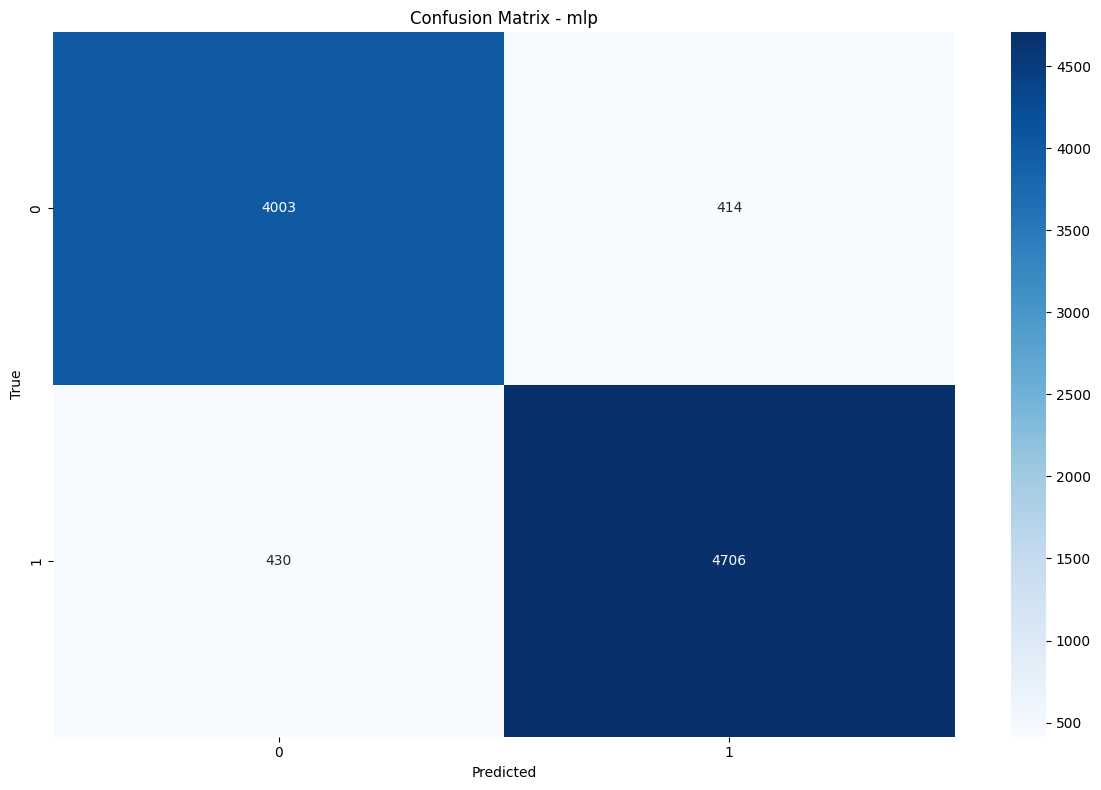

<Figure size 1000x600 with 0 Axes>

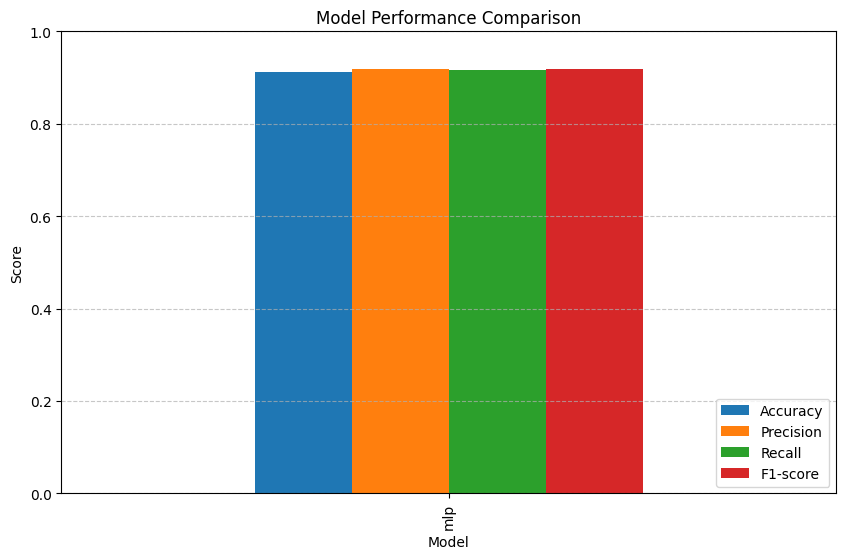

(  Model  Accuracy  Precision    Recall  F1-score
 0   mlp  0.911651   0.919141  0.916277  0.917707,
      mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
 9        37.128758      4.161077         0.094840        0.013785   
 34       31.526059      5.604499         0.091581        0.013429   
 3        66.322702     19.200914         0.094374        0.006692   
 33       37.702259      9.054540         0.102773        0.010072   
 22       33.093368      4.019892         0.093169        0.007978   
 ..             ...           ...              ...             ...   
 95       54.662025     17.028213         0.198235        0.020078   
 83       43.332204     12.253846         0.289496        0.045347   
 92       15.367168      2.283395         0.126554        0.011913   
 80       15.126323      2.434419         0.121489        0.012956   
 104      16.169412      2.193502         0.116664        0.003851   
 
     param_mlp__activation  param_mlp__alpha  param_mlp__

In [33]:
param_grid = {
            'mlp__hidden_layer_sizes': [ 
                (128, 64, 32), 
                (256, 128, 64, 32)
            ],
            'mlp__activation': ['relu', 'tanh', 'logistic'],
            'mlp__alpha': [0.0001, 0.001, 0.01],
            'mlp__learning_rate_init': [0.001, 0.0005, 0.0001],
            'mlp__batch_size': [32, 64],
        }
mlp = MLPClassifier(
            max_iter=500,
            random_state=27,
            learning_rate='adaptive',
            early_stopping= True,
            validation_fraction= 0.1
        )

optimize_with_gridsearch(mlp,param_grid,"mlp")

Evaluating MLP_Deep6 on training set...

===== MLP_Deep6: Training Set =====
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     17668
           1       0.99      0.99      0.99     20543

    accuracy                           0.99     38211
   macro avg       0.99      0.99      0.99     38211
weighted avg       0.99      0.99      0.99     38211

Evaluating MLP_Deep6 on validation set...

===== MLP_Deep6: Validation Set =====
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.91      4417
           1       0.93      0.92      0.92      5136

    accuracy                           0.92      9553
   macro avg       0.92      0.92      0.92      9553
weighted avg       0.92      0.92      0.92      9553



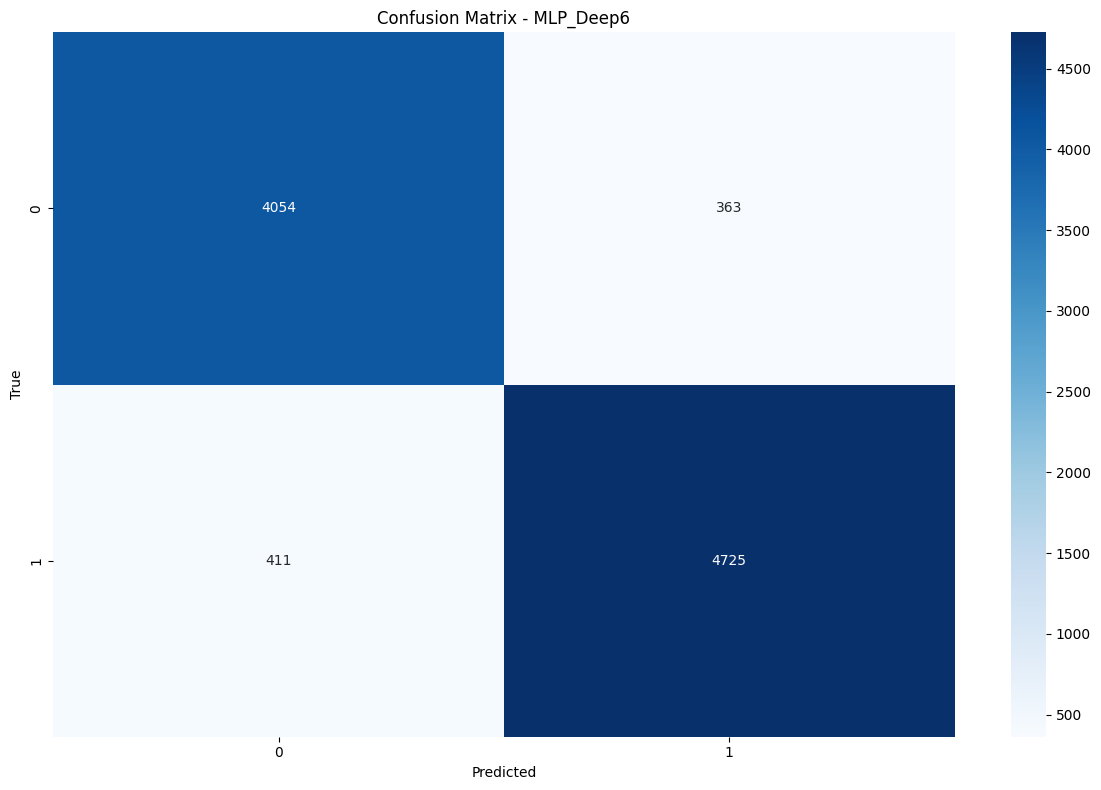

<Figure size 1000x600 with 0 Axes>

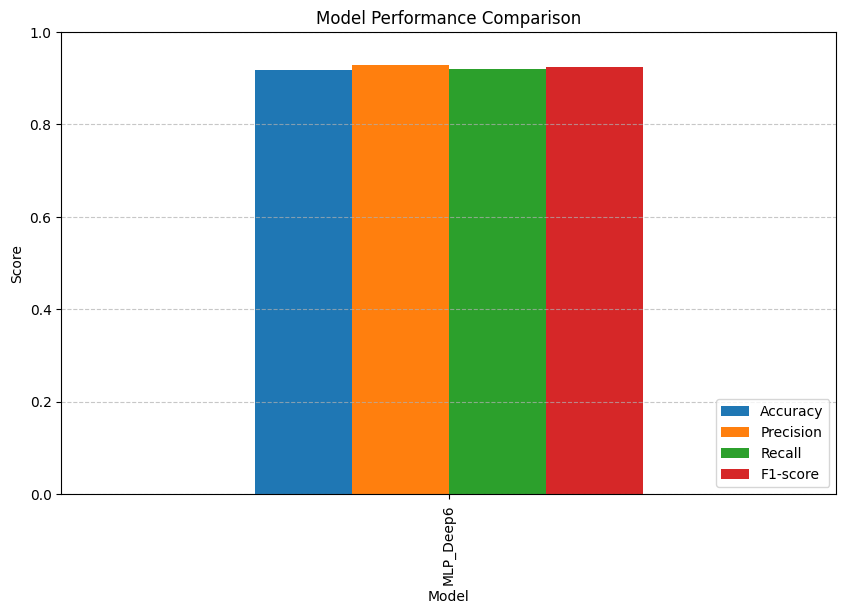

,Model,Accuracy,Precision,Recall,F1-score
0,MLP_Deep6,0.918978,0.928656,0.919977,0.924296


In [60]:
fit_pipeline_predict_evaluate(MLPClassifier(
    hidden_layer_sizes=(512, 256, 128, 64, 32, 16),
    activation='relu',
    alpha=0.00005,
    batch_size=64,
    learning_rate_init=0.001,
    max_iter=3000,
    early_stopping=True,
    validation_fraction=0.1,
    learning_rate='adaptive',
    random_state=27
), "MLP_Deep6")

In [62]:
# grid search best params:
# {'mlp__activation': 'relu', 'mlp__alpha': 0.0001, 'mlp__batch_size': 64, 'mlp__hidden_layer_sizes': (256, 128, 64, 32), 'mlp__learning_rate_init': 0.001}

# Produce: 91% accuracy

Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV 3/3] END rf__bootstrap=True, rf__max_depth=10, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100;, score=0.849 total time=  28.5s
[CV 1/3] END rf__bootstrap=True, rf__max_depth=10, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100;, score=0.855 total time=  28.5s
[CV 2/3] END rf__bootstrap=True, rf__max_depth=10, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=100;, score=0.853 total time=  28.5s
[CV 1/3] END rf__bootstrap=True, rf__max_depth=10, rf__min_samples_leaf=1, rf__min_samples_split=5, rf__n_estimators=100;, score=0.853 total time=  28.6s
[CV 2/3] END rf__bootstrap=True, rf__max_depth=10, rf__min_samples_leaf=1, rf__min_samples_split=5, rf__n_estimators=100;, score=0.851 total time=  28.7s
[CV 2/3] END rf__bootstrap=True, rf__max_depth=10, rf__min_samples_leaf=1, rf__min_samples_split=2, rf__n_estimators=200;, score=0.852 total time=  56.6s
[CV 1/3] END rf

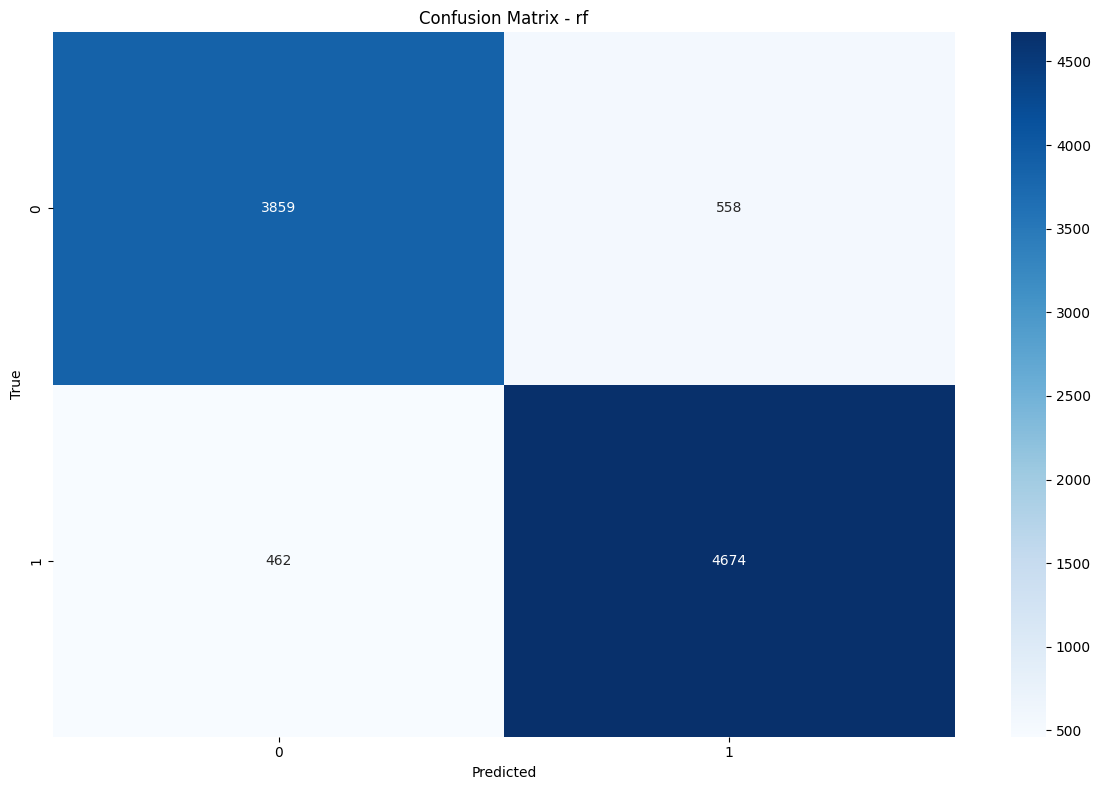

<Figure size 1000x600 with 0 Axes>

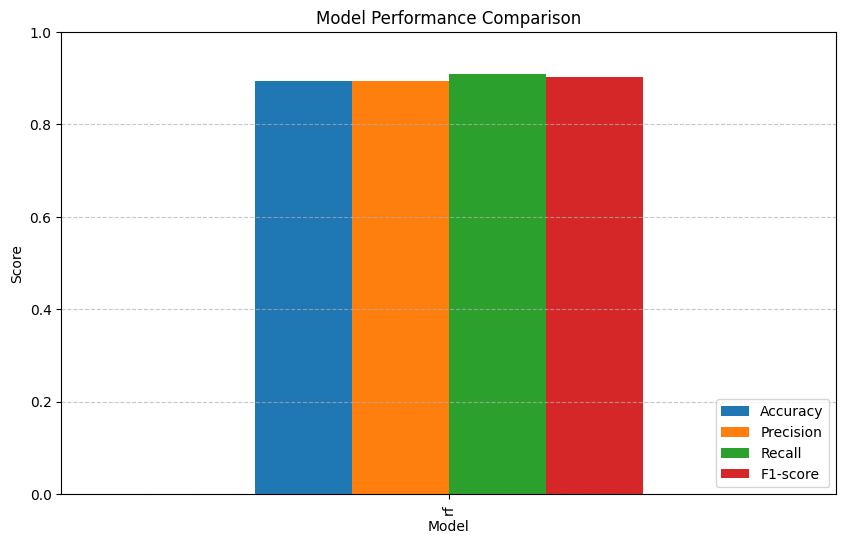

(  Model  Accuracy  Precision    Recall  F1-score
 0    rf  0.893227   0.893349  0.910047   0.90162,
     mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
 25     123.439774      1.114510         0.560894        0.081337   
 27     129.787474      3.452404         0.619869        0.061957   
 24      63.350778      0.328829         0.122523        0.005030   
 31      73.193393     19.396388         0.137744        0.023722   
 29     120.216199      7.819204         0.306516        0.116243   
 28      66.084884      0.529734         0.187650        0.065797   
 30      68.537812      0.840588         0.200591        0.033402   
 26      62.717574      0.187557         0.169892        0.051653   
 9       83.820987      0.381344         0.357435        0.040237   
 13      76.836717      0.520406         0.429628        0.179344   
 15      77.242197      0.220517         0.315136        0.040548   
 11      80.464373      1.317974         0.393167        0.042687   
 1

In [37]:
param_grid = {
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [10, 20],
    'rf__min_samples_split': [2, 5],
    'rf__min_samples_leaf': [1, 2],
    'rf__bootstrap': [True, False]
}

# Instantiate the RandomForestClassifier
rf = RandomForestClassifier(
    random_state=27,
    n_jobs=-1
)

# Call the optimize function with Random Forest
optimize_with_gridsearch(rf, param_grid, "rf")

Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV] END hgb__l2_regularization=0.0, hgb__learning_rate=0.1, hgb__max_depth=10, hgb__max_iter=100, hgb__min_samples_leaf=50; total time=   6.3s
[CV] END hgb__l2_regularization=0.0, hgb__learning_rate=0.1, hgb__max_depth=10, hgb__max_iter=100, hgb__min_samples_leaf=50; total time=   6.4s
[CV] END hgb__l2_regularization=0.0, hgb__learning_rate=0.1, hgb__max_depth=10, hgb__max_iter=100, hgb__min_samples_leaf=50; total time=   6.4s
[CV] END hgb__l2_regularization=0.0, hgb__learning_rate=0.1, hgb__max_depth=10, hgb__max_iter=100, hgb__min_samples_leaf=20; total time=   6.6s
[CV] END hgb__l2_regularization=0.0, hgb__learning_rate=0.1, hgb__max_depth=10, hgb__max_iter=100, hgb__min_samples_leaf=20; total time=   6.7s
[CV] END hgb__l2_regularization=0.0, hgb__learning_rate=0.1, hgb__max_depth=10, hgb__max_iter=100, hgb__min_samples_leaf=20; total time=   6.9s
[CV] END hgb__l2_regularization=0.0, hgb__learning_rate=0.1, hgb__max_depth

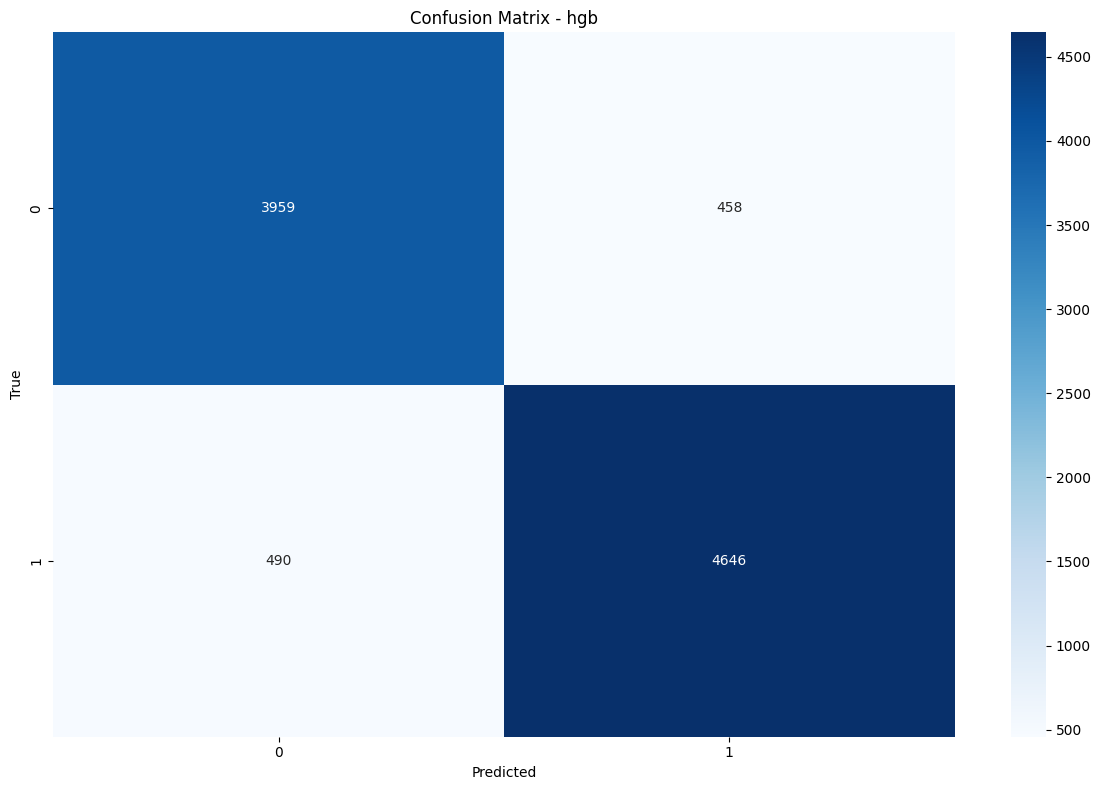

<Figure size 1000x600 with 0 Axes>

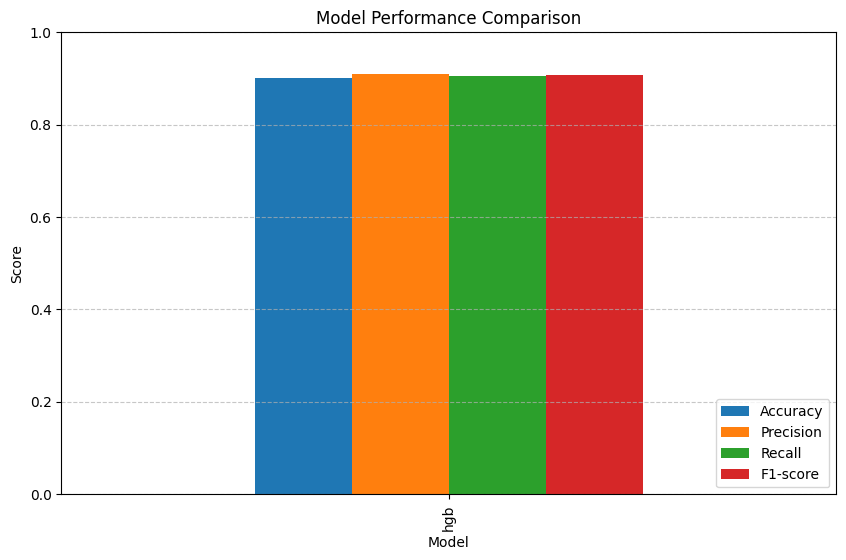

(  Model  Accuracy  Precision    Recall  F1-score
 0   hgb  0.900764   0.910266  0.904595  0.907422,
     mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
 7        9.144491      0.144110         0.410310        0.025925   
 23      10.244134      0.362927         0.607478        0.034510   
 18       9.381071      0.160812         0.399952        0.029039   
 6        9.433335      0.099663         0.375608        0.038701   
 3        9.527239      0.223849         0.422196        0.023845   
 19       8.867665      0.090377         0.439822        0.015509   
 22      10.598322      0.495871         0.574515        0.128423   
 2        9.977697      0.124284         0.435481        0.029417   
 26      10.670385      0.189435         0.512785        0.039531   
 11      10.348762      0.328508         0.529821        0.069611   
 10      10.269751      0.243717         0.473024        0.021082   
 14      11.438275      0.184559         0.525381        0.042090   
 3

In [39]:
from sklearn.ensemble import HistGradientBoostingClassifier

# Define parameter grid
param_grid = {
    'hgb__learning_rate': [0.1, 0.05],
    'hgb__max_iter': [100, 200],
    'hgb__max_depth': [10, 20],
    'hgb__min_samples_leaf': [20, 50],
    'hgb__l2_regularization': [0.0, 1.0]
}

# Instantiate the HistGradientBoostingClassifier
hgb = HistGradientBoostingClassifier(
    random_state=27
)

# Run grid search
optimize_with_gridsearch(hgb, param_grid, "hgb")

## Sound Testing

In [ ]:
# issue with winsound as I am using MacOS (h)
import winsound

def listen_to_misclassified(data, values, predictions, labels, n):
    """
    Function to listen to misclassified audio files
    :param data: DataFrame
    :param values: true values
    :param predictions: predicted values
    :param labels: possible labels
    :param n: number of audio files to listen to
    
    :return: None
    """
    j=0
    label_num=0
    pred = pd.Series(predictions, index=values.index)
    
    for k in labels:
        print(f"Listening to {n//len(labels)} audio files misclassified as {k}:")
        label_num+=1
        winsound.Beep(1000, 800)
        winsound.Beep(2000, 700)
        for i in values.index:
            if values[i] != pred[i] and pred[i]==k:
                if j>=((n//len(labels))*label_num):
                    break
                j+=1
                winsound.Beep(1000, 200)
                print(f"\t Playing {data.loc[i, 'path']}")
                playsound.playsound(data.loc[i, "path"])
        
        
                    
    winsound.Beep(1000, 800)
    winsound.Beep(1000, 800)
    winsound.Beep(1000, 800)
    
    
        
listen_to_misclassified(data_raw, y_val["gender"],pipeline_logistic_regression.predict(X_val), ["male_masculine", "female_feminine"], 10)
    


Listening to 5 audio files misclassified as male_masculine:


NameError: name 'winsound' is not defined